<img src="../../../images/banners/seaborn.png" width="500"/>

<a class="anchor" id="visualizing_statistical_relationships"></a>
# <img src="../../../images/logos/seaborn.png" width="23"/>  Visualizing Statistical Relationships

## <img src="../../../images/logos/toc.png" width="20"/> Table of Contents 

* [Relating variables with scatter plots](#relating_variables_with_scatter_plots)
* [Emphasizing continuity with line plots](#emphasizing_continuity_with_line_plots)
    * [Aggregation and representing uncertainty](#aggregation_and_representing_uncertainty)
    * [Plotting subsets of data with semantic mappings](#plotting_subsets_of_data_with_semantic_mappings)
    * [Controlling sorting and orientation](#controlling_sorting_and_orientation)
* [Showing multiple relationships with facets](#showing_multiple_relationships_with_facets)

---

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

sns.set(style='whitegrid')

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

We will discuss three seaborn functions in this tutorial. The one we will use most is [`relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot). This is a [figure-level function](https://seaborn.pydata.org/tutorial/function_overview.html) for visualizing statistical relationships using two common approaches: scatter plots and line plots. **[`relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) combines a [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) with one of two axes-level functions:**

- `scatterplot()` (with `kind="scatter"`; the default)
- `lineplot()` (with `kind="line"`)

As we will see, these functions can be quite illuminating because they use simple and easily-understood representations of data that can nevertheless represent complex dataset structures. They can do so because **they plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using the semantics of hue, size, and style.**

<a class="anchor" id="relating_variables_with_scatter_plots"></a>
## Relating variables with scatter plots

The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the [`scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) function. In the [categorical visualization tutorial](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial), we will see specialized tools for using scatterplots to visualize categorical data. The [`scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) is the default `kind` in [`relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) (it can also be forced by setting `kind="scatter"`):

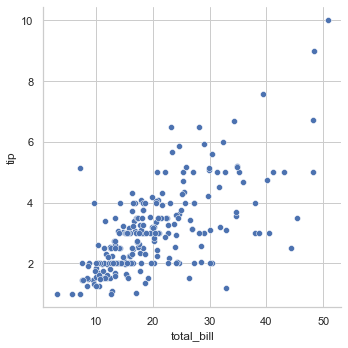

In [3]:
tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip")

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

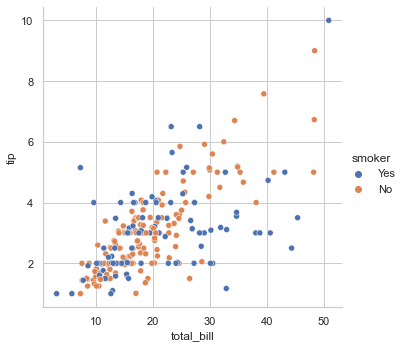

In [4]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

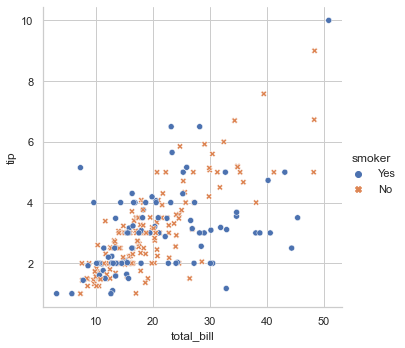

In [5]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="smoker"
)

It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color:

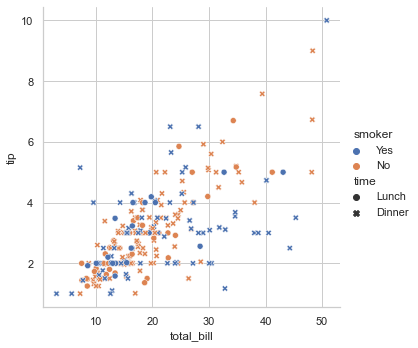

In [6]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="time",
)

In the examples above, the hue semantic was categorical, so the default [qualitative palette](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial) was applied. If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette:

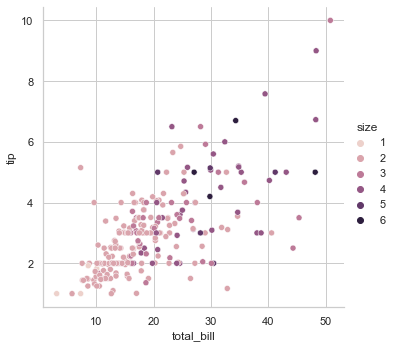

In [7]:
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size",
)

In both cases, you can customize the color palette. There are many options for doing so. Here, we customize a sequential palette using the string interface to [`cubehelix_palette()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.cubehelix_palette.html#seaborn.cubehelix_palette "seaborn.cubehelix_palette"):

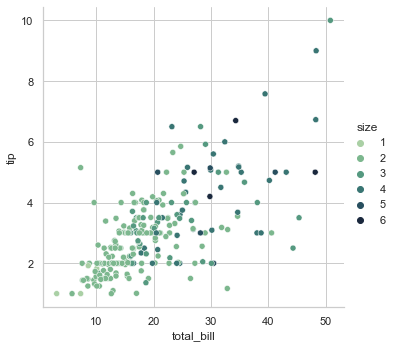

In [8]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    hue="size", palette="ch:r=-.5,l=.75"
)

The third kind of semantic variable changes the size of each point:

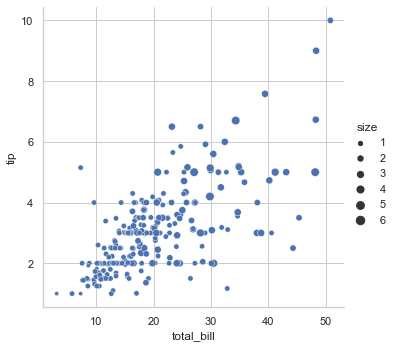

In [9]:
sns.relplot(data=tips, x="total_bill", y="tip", size="size")

Unlike with [`matplotlib.pyplot.scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter "(in Matplotlib v3.6.0)"), the literal value of the variable is not used to pick the area of the point. Instead, the range of values in data units is normalized into a range in area units. This range can be customized:

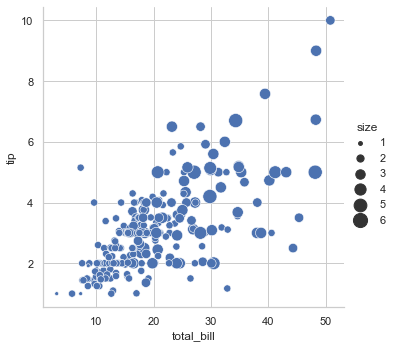

In [10]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(15, 200)
)

More examples for customizing how the different semantics are used to show statistical relationships are shown in the [`scatterplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.scatterplot.html#seaborn.scatterplot "seaborn.scatterplot") API examples.

<a class="anchor" id="emphasizing_continuity_with_line_plots"></a>
## Emphasizing continuity with line plots

Scatter plots are highly effective, but there is no universally optimal type of visualisation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the [`lineplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.lineplot.html#seaborn.lineplot "seaborn.lineplot") function, either directly or with [`relplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.relplot.html#seaborn.relplot "seaborn.relplot") by setting `kind="line"`:

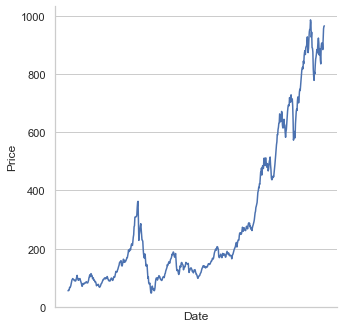

In [11]:
dowjones = sns.load_dataset("dowjones")
ax = sns.relplot(data=dowjones, x="Date", y="Price", kind="line")
ax.set(xticks=[])

<a class="anchor" id="aggregation_and_representing_uncertainty"></a>
### Aggregation and representing uncertainty

More complex datasets will have multiple measurements for the same value of the `x` variable. The default behavior in seaborn is to aggregate the multiple measurements at each `x` value by plotting the mean and the 95% confidence interval around the mean:

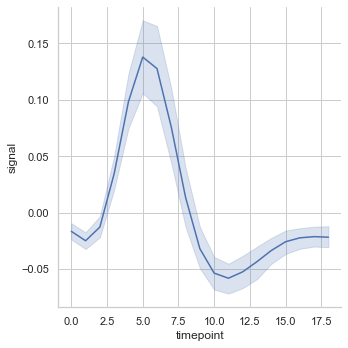

In [12]:
fmri = sns.load_dataset("fmri")
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

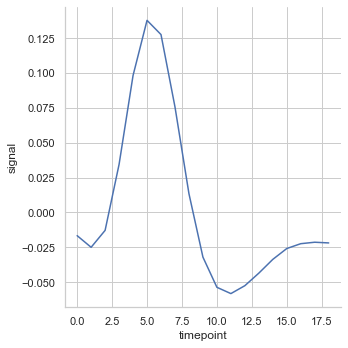

In [37]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    errorbar=None,
)

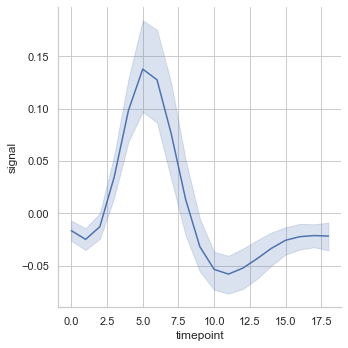

In [41]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    errorbar=('ci', 99),
)

You can see how 90% and 99% confidence intervals result in different errorbars:

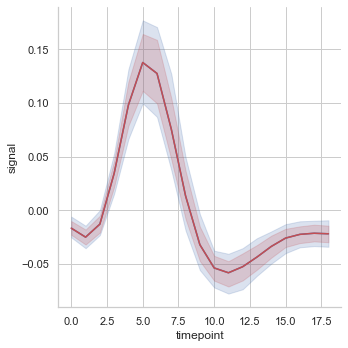

In [110]:
fmri = sns.load_dataset('fmri')
g = sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    kind='line',
    errorbar=('ci', 99),
)

g.map(sns.lineplot, data=fmri, x='timepoint', y='signal', errorbar=('ci', 90), color='r')

Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

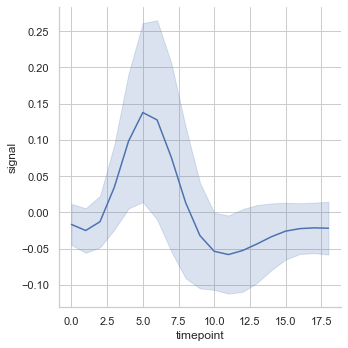

In [42]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar="sd",
)

To turn off aggregation altogether, set the `estimator` parameter to `None` This might produce a strange effect when the data have multiple observations at each point.

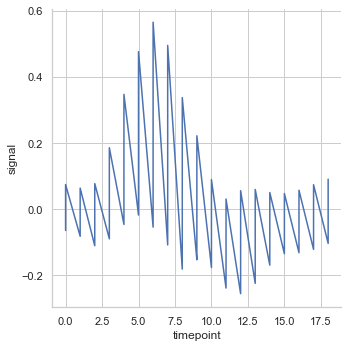

In [64]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    estimator=None,
)

Which is basically connecting the all the data points:

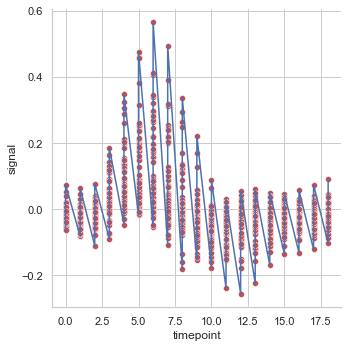

In [115]:
g = sns.relplot(
    data=fmri,
    kind='line',
    x='timepoint', y='signal',
    estimator=None,
)

g.map(sns.scatterplot, data=fmri, x='timepoint', y='signal', color='r')

<a class="anchor" id="plotting_subsets_of_data_with_semantic_mappings"></a>
### Plotting subsets of data with semantic mappings

The [`lineplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.lineplot.html#seaborn.lineplot "seaborn.lineplot") function has the same flexibility as [`scatterplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.scatterplot.html#seaborn.scatterplot "seaborn.scatterplot"): it can show up to three additional variables by modifying the hue, size, and style of the plot elements. It does so using the same API as [`scatterplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.scatterplot.html#seaborn.scatterplot "seaborn.scatterplot"), meaning that we don’t need to stop and think about the parameters that control the look of lines vs. points in matplotlib.

Using semantics in [`lineplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.lineplot.html#seaborn.lineplot "seaborn.lineplot") will also determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.

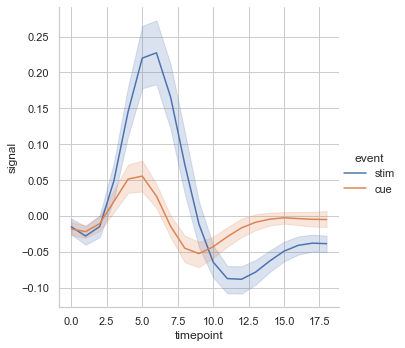

In [65]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event",
)

Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

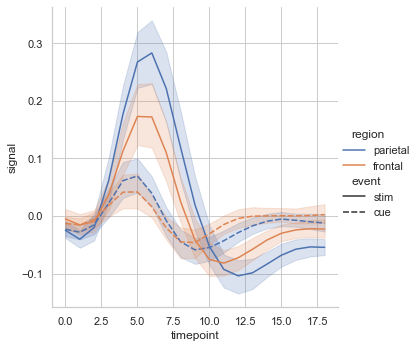

In [66]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event",
)

But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them:

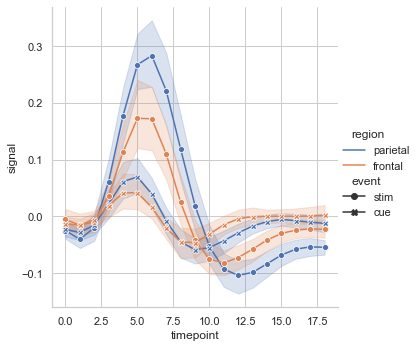

In [70]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
)

As with scatter plots, be cautious about making line plots using multiple semantics. While sometimes informative, they can also be difficult to parse and interpret. But even when you are only examining changes across one additional variable, it can be useful to alter both the color and style of the lines. This can make the plot **more accessible when printed to black-and-white or viewed by someone with color blindness**:

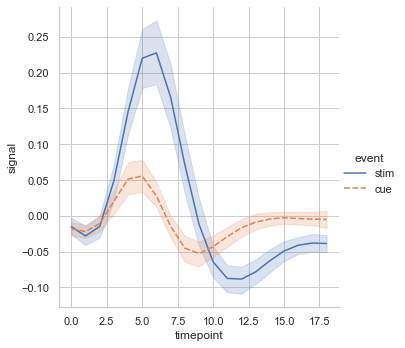

In [71]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="event", style="event",
)

When you are working with repeated measures data (that is, you have units that were sampled multiple times), you can also plot each sampling unit separately without distinguishing them through semantics. This avoids cluttering the legend:

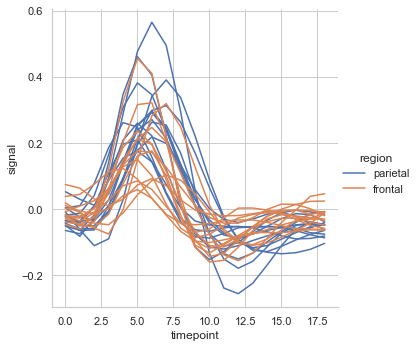

In [74]:
sns.relplot(
    data=fmri.query("event == 'stim'"), kind="line",
    x="timepoint", y="signal", hue="region",
    units="subject", estimator=None,
)

> When `units` is used, a separate line will be drawn for each unit with appropriate semantics, but no legend entry will be added. Useful for showing distribution of experimental replicates when exact identities are not needed.

The default colormap and handling of the legend in [`lineplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.lineplot.html#seaborn.lineplot "seaborn.lineplot") also depends on whether the hue semantic is categorical or numeric:

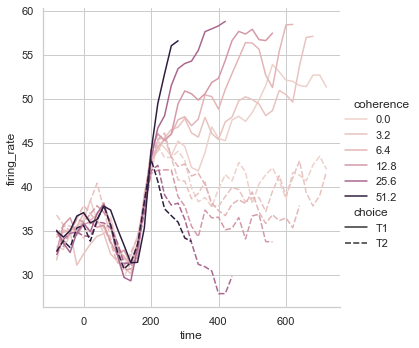

In [75]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
)

It may happen that, even though the `hue` variable is numeric, it is poorly represented by a linear color scale. That’s the case here, where the levels of the `hue` variable are logarithmically scaled. You can provide specific color values for each line by passing a list or dictionary:

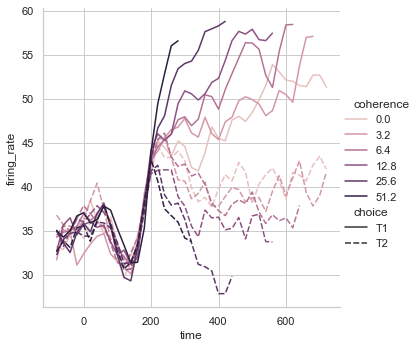

In [88]:
palette = sns.cubehelix_palette(light=0.8, n_colors=6)
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice", palette=palette,
)

Or you can alter how the colormap is normalized:

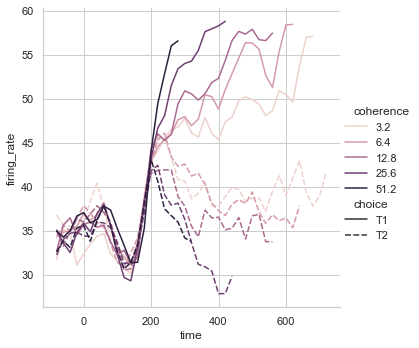

In [86]:
from matplotlib.colors import LogNorm

palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(
    data=dots.query("coherence > 0"), kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
    hue_norm=LogNorm(),
)

The third semantic, size, changes the width of the lines:

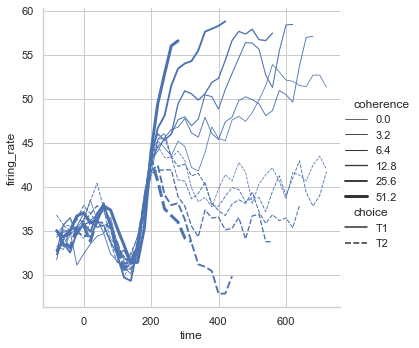

In [87]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    size="coherence", style="choice",
)

While the `size` variable will typically be numeric, it’s also possible to map a categorical variable with the width of the lines. Be cautious when doing so, because it will be difficult to distinguish much more than “thick” vs “thin” lines. However, dashes can be hard to perceive when lines have high-frequency variability, so using different widths may be more effective in that case:

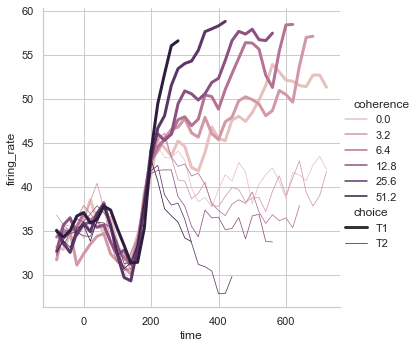

In [89]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", size="choice", palette=palette,
)

<a class="anchor" id="controlling_sorting_and_orientation"></a>
### Controlling sorting and orientation

Because [`lineplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.lineplot.html#seaborn.lineplot "seaborn.lineplot") assumes that you are most often trying to draw `y` as a function of `x`, the default behavior is to sort the data by the `x` values before plotting. However, this can be disabled:

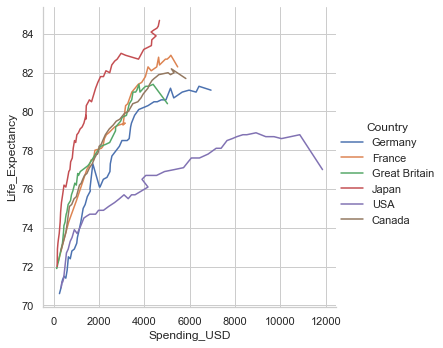

In [92]:
healthexp = sns.load_dataset("healthexp").sort_values("Year")
sns.relplot(
    data=healthexp, kind="line",
    x="Spending_USD", y="Life_Expectancy", hue="Country",
    sort=False,
)

It’s also possible to sort (and aggregate) along the y axis:

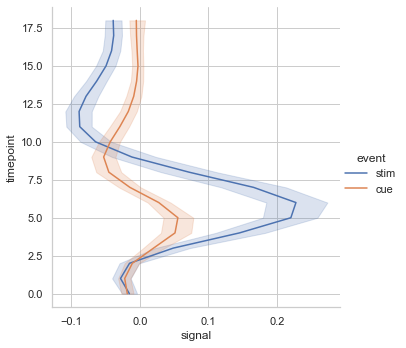

In [97]:
sns.relplot(
    data=fmri, kind="line",
     x="signal", y="timepoint", hue="event",
    orient="y",
)

<a class="anchor" id="showing_multiple_relationships_with_facets"></a>
## Showing multiple relationships with facets

We’ve emphasized in this tutorial that, while these functions *can* show several semantic variables at once, it’s not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because [`relplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.relplot.html#seaborn.relplot "seaborn.relplot") is based on the [`FacetGrid`](https://seaborn.pydata.org/tutorial/../generated/seaborn.FacetGrid.html#seaborn.FacetGrid "seaborn.FacetGrid"), this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

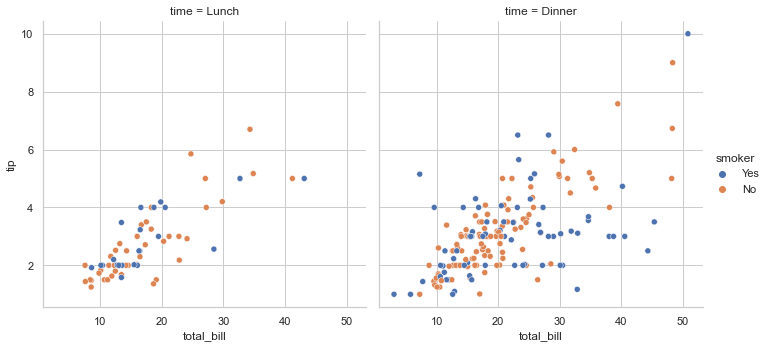

In [98]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", col="time",
)

You can also show the influence of two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size [`FacetGrid`](https://seaborn.pydata.org/tutorial/../generated/seaborn.FacetGrid.html#seaborn.FacetGrid "seaborn.FacetGrid") is parameterized by the height and aspect ratio of *each facet*:

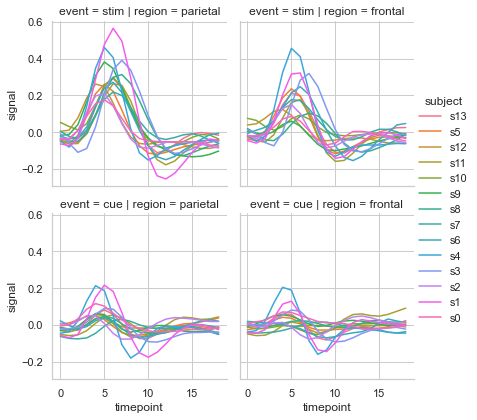

In [101]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="subject",
    col="region", row="event", height=3,
    estimator=None
)

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows:

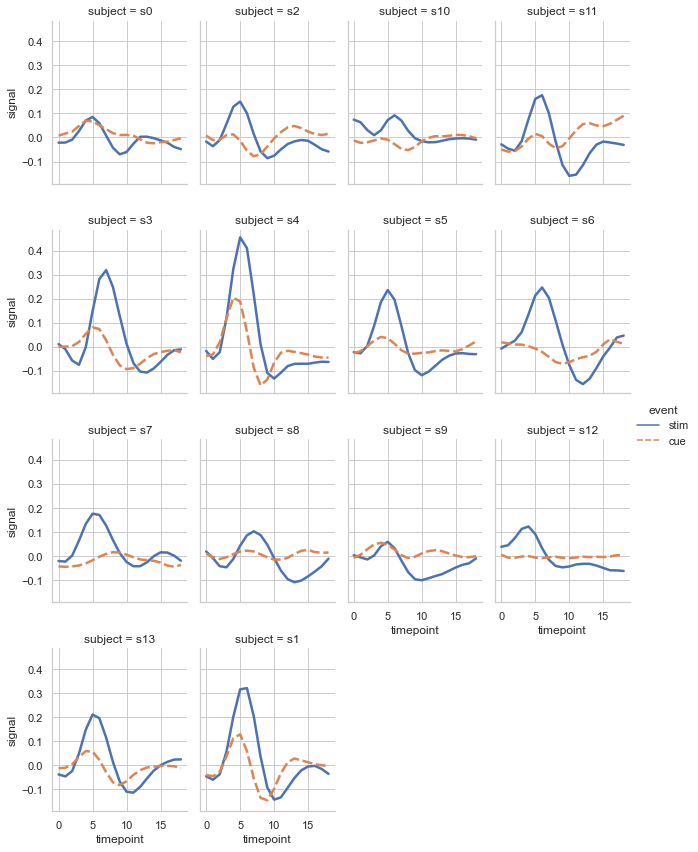

In [109]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=4,
    height=3, aspect=0.75, linewidth=2.5,
)

These visualizations, which are sometimes called “lattice” plots or “small-multiples”, are very effective because they present the data in a format that **makes it easy for the eye to detect both overall patterns and deviations from those patterns**. While you should make use of the flexibility afforded by [`scatterplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.scatterplot.html#seaborn.scatterplot "seaborn.scatterplot") and [`relplot()`](https://seaborn.pydata.org/tutorial/../generated/seaborn.relplot.html#seaborn.relplot "seaborn.relplot"), always try to keep in mind that **several simple plots are usually more effective than one complex plot.**